# Case 2 - Positive vs. Negative Emotions

## Import libraries

In [519]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from matplotlib.patches import Ellipse

## Loading data

In [520]:
data_path = '../data/HR_data.csv'
data = pd.read_csv(data_path)

# Saving the column names
columns = data.columns.tolist()

# Print the first few rows of the dataset
#print(data.head())

# Printing the shape of the dataset
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Checking for missing values (True/False)
print("Does the dataset have missing values?", data.isnull().values.any())

# Show the columns with missing values
missing_columns = data.columns[data.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)

The dataset has 312 rows and 68 columns.
Does the dataset have missing values? True
Columns with missing values: ['EDA_TD_P_RT', 'EDA_TD_P_ReT', 'inspired', 'attentive', 'afraid', 'active', 'determined']


## Data Wrangling

### Handling missing values

In [521]:
# Mean Imputation: Using SimpleImputer from scikit-learn to impute the missing values in the data (for numerical variables) with the mean
numerical_imputer = SimpleImputer(strategy='mean')

# Imputing the missing numerical values in the data with the mean (for columns 'EDA_TD_P_RT', 'EDA_TD_P_ReT')
data[['EDA_TD_P_RT', 'EDA_TD_P_ReT']] = numerical_imputer.fit_transform(data[['EDA_TD_P_RT', 'EDA_TD_P_ReT']])

# Mode Imputation: Using SimpleImputer from scikit-learn to impute the missing values in the data (for categorical variables) with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data = categorical_imputer.fit_transform(data)

# Converting the imputed data back to a DataFrame
data = pd.DataFrame(data, columns=columns)

# Checking for missing values (True/False)
print("Does the dataset have missing values?", data.isnull().values.any())

Does the dataset have missing values? False


### Moving Columns Around

In [522]:
# Move Unnamed: 0,Round,Phase,Individual,Puzzler,Cohort to the front of the DataFrame
data = data[['Unnamed: 0', 'Round', 'Phase', 'Individual', 'Puzzler', 'Cohort'] + [col for col in data.columns if col not in ['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']]]

### Splitting the Data Into Self-Rated Questionaire (Emo) and Bio-Signals

In [523]:
# Self-Rated Questionaire
emo_signals = data.iloc[:, -10:]

# Bio-Signals
bio_signals = data.iloc[:, :-11]
# Only keep the columns that starts with 'HR', 'TEMP', or 'EDA'
bio_signals = bio_signals.loc[:, bio_signals.columns.str.startswith(('HR', 'TEMP', 'EDA'))]

### Normalizing

In [524]:
# Normalizing bio_signals and emo_signals using StandardScaler
scaler = StandardScaler()
bio_signals_scaled = scaler.fit_transform(bio_signals)
emo_signals_scaled = scaler.fit_transform(emo_signals)

# Print column names of the scaled data
print("Scaled bio_signals columns:", bio_signals.columns.tolist())
print("Scaled emo_signals columns:", emo_signals.columns.tolist())

Scaled bio_signals columns: ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
Scaled emo_signals columns: ['upset', 'hostile', 'alert', 'ashamed', 'inspired

### Splitting the Emo-signals into Positive and Negative Emotions

In [525]:
# Making emo_signals_scaled a pandas DataFrame
emo_signals_scaled = pd.DataFrame(emo_signals_scaled, columns=emo_signals.columns)

# Divide Frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined into positive and negative
positive = emo_signals_scaled[['inspired', 'attentive', 'determined','active','alert']]
negative = emo_signals_scaled[['upset', 'hostile', 'ashamed', 'nervous', 'afraid']]

# Positive vs. Negative Emotions

### Computing Principal Components

In [526]:
# Fit PCA to standardized data
pca = PCA()
emo_signals_pca = pca.fit_transform(emo_signals_scaled)

## Positive vs. Negative

Number of Positive moods: 142
Number of Negative moods: 170


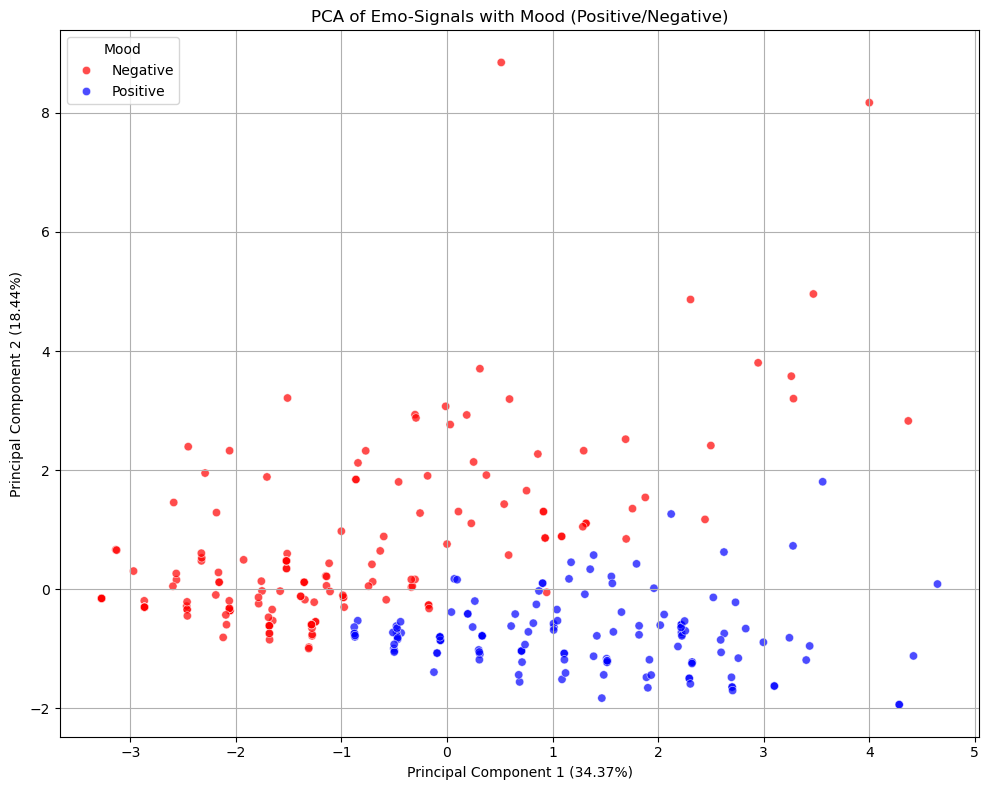

In [527]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(emo_signals_pca.shape[1])]
df_pca = pd.DataFrame(emo_signals_pca, columns=pc_cols)

# Calculating the mean of the positive and negative self-rated questionnaire
positive_mean = np.mean(positive, axis=1)
negative_mean = np.mean(negative, axis=1)

# Adding the mean values to the PCA DataFrame
df_pca['Positive'] = positive_mean
df_pca['Negative'] = negative_mean

#print(df_pca)

# Make a dataframe of top 50% of positive and negative self-rated questionnaire
df_pca['Positive'] = np.where(df_pca['Positive'] > df_pca['Negative'], 1, 0) # if greater than median, 1 else 0 
#df_pca['Negative'] = np.where(df_pca['Negative'] > df_pca['Positive'](), 1, 0) # if greater than median, 1 else 0

# Combine the Positive and Negative columns into a single column where 1 = Positive, -1 = Negative
df_pca['Mood'] = np.where(df_pca['Positive'] == 1, 'Positive', 'Negative') # if positive = 1, then mood = positive else negative

# Count number of positive and negative moods
positive_count = df_pca['Mood'].value_counts().get('Positive', 0)
negative_count = df_pca['Mood'].value_counts().get('Negative', 0)
print(f"Number of Positive moods: {positive_count}")
print(f"Number of Negative moods: {negative_count}")

# Plotting the PCA results with Mood
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Mood', palette={'Positive': 'blue', 'Negative': 'red'}, alpha=0.7)
plt.title('PCA of Emo-Signals with Mood (Positive/Negative)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.legend(title='Mood')
plt.tight_layout()
plt.show()

### Participants Feeling the Most

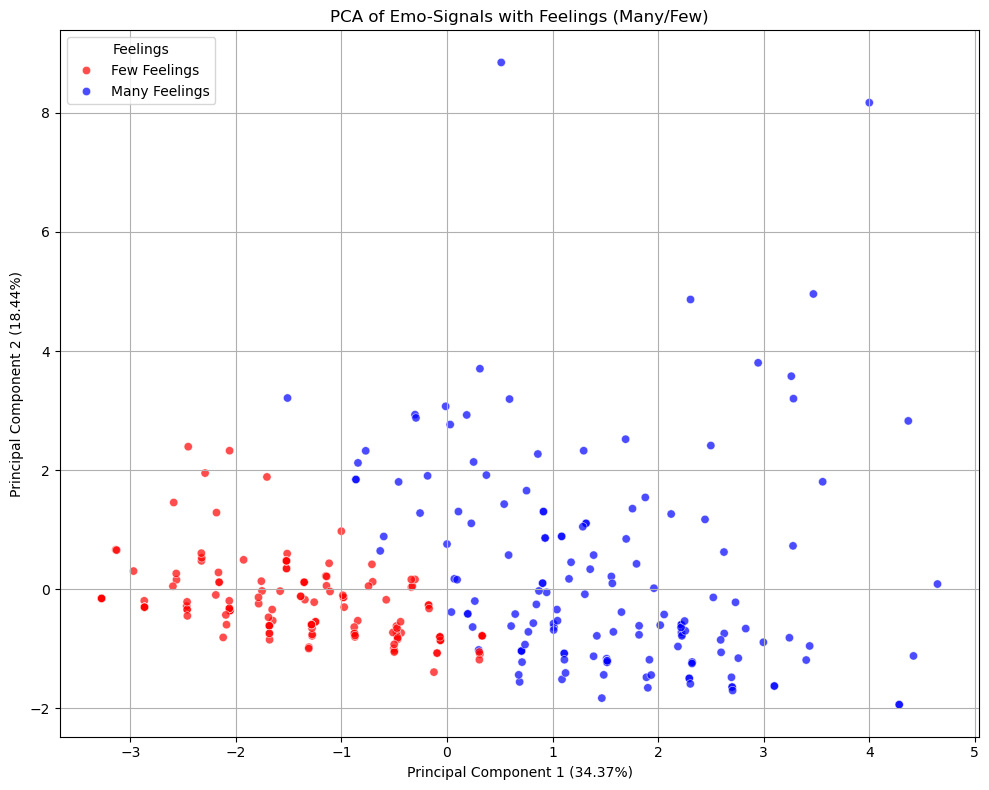

In [528]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(emo_signals_pca.shape[1])]
df_pca = pd.DataFrame(emo_signals_pca, columns=pc_cols)

# Calculating the mean of the emo_signals
emo_signals_mean = np.mean(emo_signals_scaled, axis=1)

# Adding the mean values to the PCA DataFrame
df_pca['Mean'] = emo_signals_mean

# Make a dataframe of top 50% most feeling participants
df_pca['Mean'] = np.where(df_pca['Mean'] > df_pca['Mean'].median(), 1, 0) # if greater than median, 1 else 0

# Make a column called Feelings where 0 = few feelings and 1 = many feelings
df_pca['Feelings'] = np.where(df_pca['Mean'] == 1, 'Many Feelings', 'Few Feelings') # if mean = 1, then feelings = many else few

# Plotting the PCA results with Feelings
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Feelings', palette={'Many Feelings': 'blue', 'Few Feelings': 'red'}, alpha=0.7)
plt.title('PCA of Emo-Signals with Feelings (Many/Few)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.legend(title='Feelings')
plt.tight_layout()
plt.show()



## Emo-signals and Phases

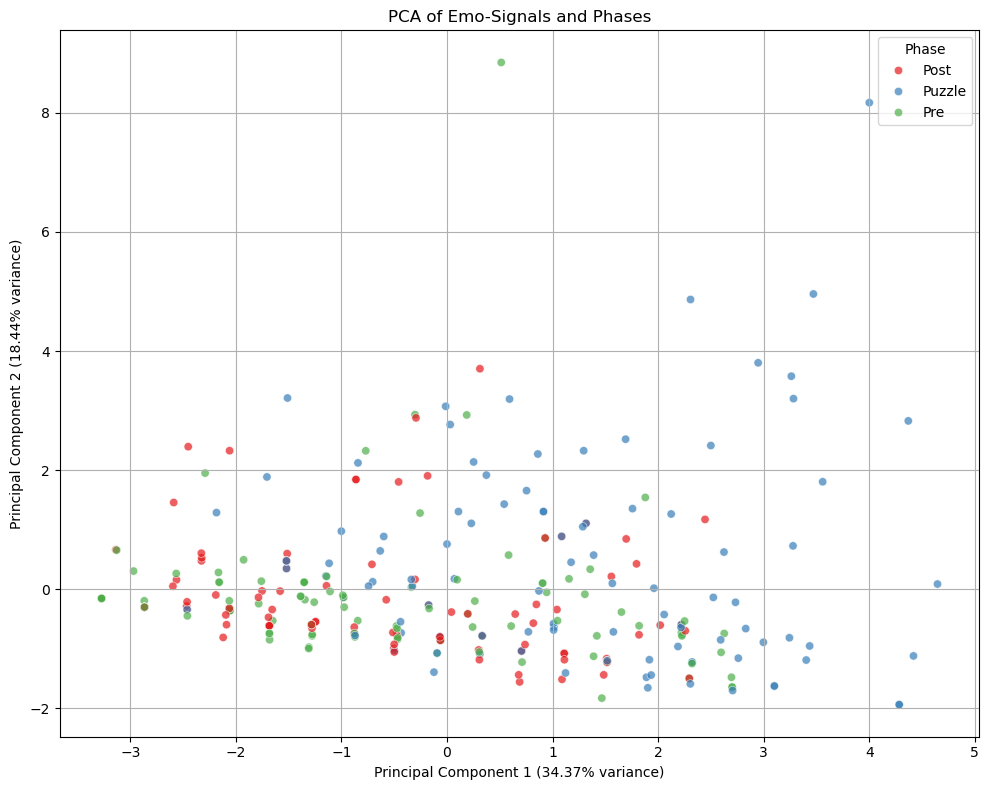

In [529]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(emo_signals_pca.shape[1])]
df_pca = pd.DataFrame(emo_signals_pca, columns=pc_cols)
df_pca['Phase'] = data['Phase'].values

# Rename phases to 'Pre', 'Puzzle', 'Post'
df_pca['Phase'] = df_pca['Phase'].replace({'phase1': 'Pre', 'phase2': 'Puzzle', 'phase3': 'Post'})

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Phase', palette='Set1', alpha=0.7)
plt.title('PCA of Emo-Signals and Phases')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.grid(True)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

### PCA Biplot (PCA plot + Loading plot)

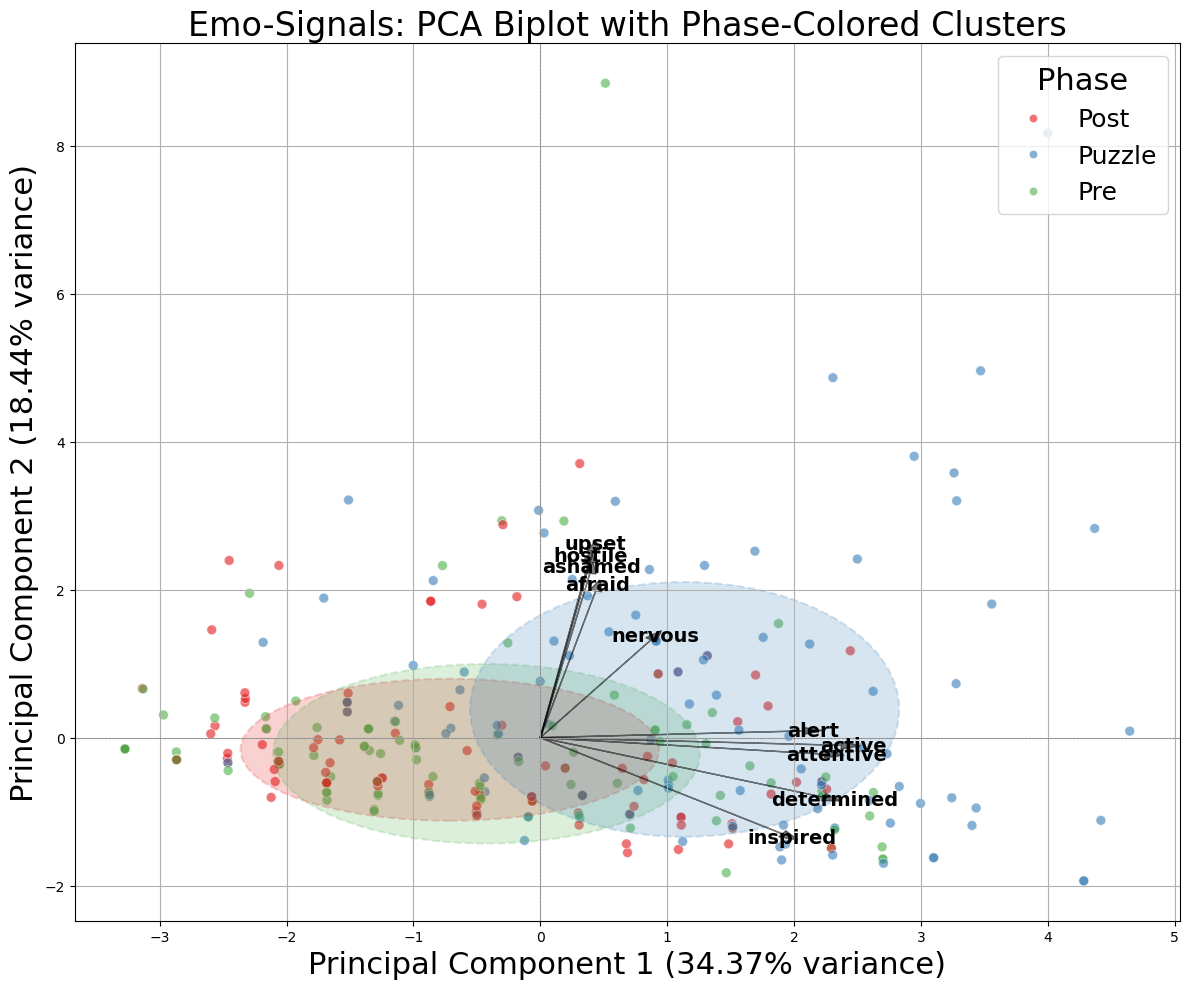

In [530]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(emo_signals_pca.shape[1])]
df_pca = pd.DataFrame(emo_signals_pca, columns=pc_cols)
df_pca['Phase'] = data['Phase'].values

# Rename phases to 'Pre', 'Puzzle', 'Post'
df_pca['Phase'] = df_pca['Phase'].replace({'phase1': 'Pre', 'phase2': 'Puzzle', 'phase3': 'Post'})

# Add a constant size for the bubbles
df_pca['size'] = 100  # constant bubble size

# Set up the color palette
phases = df_pca['Phase'].unique()
palette = sns.color_palette('Set1', n_colors=len(phases))
phase_colors = dict(zip(phases, palette))

# Start the plot
plt.figure(figsize=(12, 10))

# Bubble scatterplot
scatter = sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Phase',
    size='size', sizes=(50, 300),
    alpha=0.6, palette=phase_colors, legend='brief'
)

# Add ellipses colored like the points
for phase, group in df_pca.groupby('Phase'):
    x_mean = group['PC1'].mean()
    y_mean = group['PC2'].mean()
    x_std = group['PC1'].std()
    y_std = group['PC2'].std()

    ellipse = Ellipse(
        (x_mean, y_mean),
        width=2 * x_std, height=2 * y_std,
        edgecolor=phase_colors[phase],
        facecolor=phase_colors[phase],
        alpha=0.2,
        linestyle='--',
        linewidth=1.5
    )
    plt.gca().add_patch(ellipse)

# Add variable loadings as arrows
loadings = pca.components_.T[:, :2]
feature_names = emo_signals_scaled.columns if hasattr(emo_signals_scaled, 'columns') else [f'Var{i+1}' for i in range(loadings.shape[0])]
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x * 5, y * 5, color='black', alpha=0.5, head_width=0.1)
    plt.text(x * 5.2, y * 5.2, feature_names[i], color='black', ha='center', va='center', fontsize=14, weight='bold')

# Plot formatting
plt.title('Emo-Signals: PCA Biplot with Phase-Colored Clusters', fontsize=24)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=22)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=22)
plt.grid(True)
plt.axhline(0, linestyle='--', color='grey', linewidth=0.5)
plt.axvline(0, linestyle='--', color='grey', linewidth=0.5)
# Remove size legend from the handles
handles, labels = scatter.get_legend_handles_labels()
new_handles = []
new_labels = []
# Only keep the handles/labels related to 'Phase'
for handle, label in zip(handles, labels):
    if label in df_pca['Phase'].unique().astype(str):
        new_handles.append(handle)
        new_labels.append(label)
plt.legend(new_handles, new_labels, title='Phase', loc='upper right', fontsize=18, title_fontsize=22)
plt.tight_layout()
plt.savefig('emo_signals_pca_biplot.png', dpi=300, bbox_inches='tight') # Save the figure
plt.show()

# Focusing on Bio-signals

### Computing Principal Components

In [531]:
# Fit PCA to standardized data
pca = PCA()
bio_signals_pca = pca.fit_transform(bio_signals_scaled)

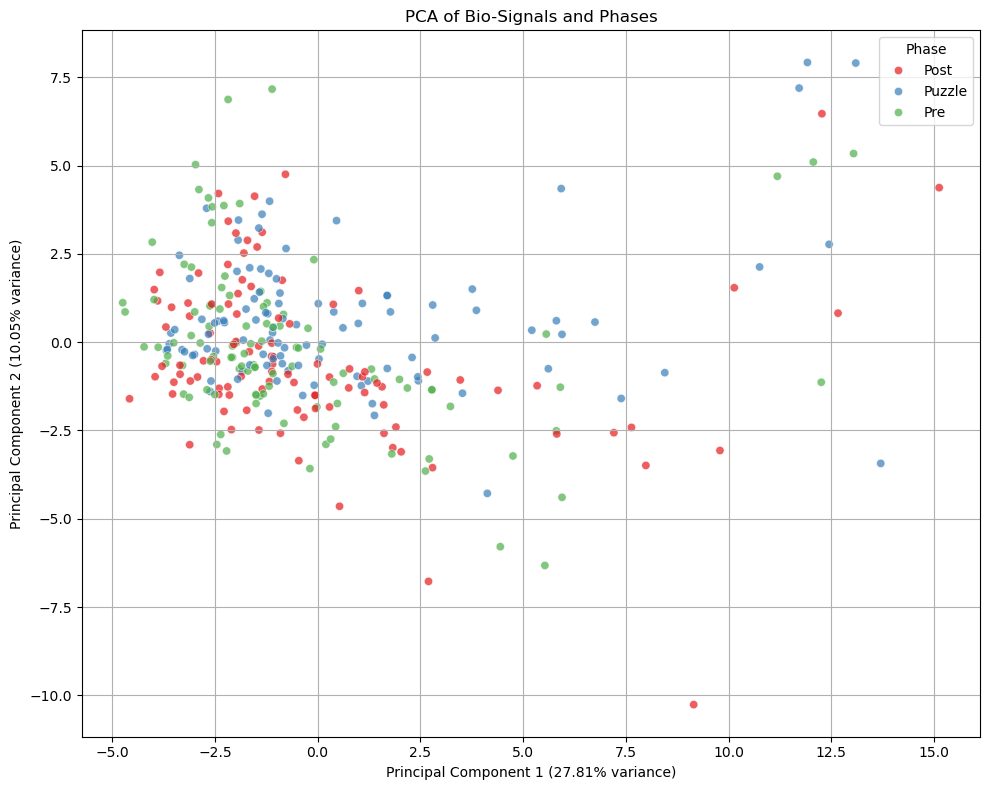

In [532]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(bio_signals_pca.shape[1])]
df_pca = pd.DataFrame(bio_signals_pca, columns=pc_cols)
df_pca['Phase'] = data['Phase'].values

# Rename phases to 'Pre', 'Puzzle', 'Post'
df_pca['Phase'] = df_pca['Phase'].replace({'phase1': 'Pre', 'phase2': 'Puzzle', 'phase3': 'Post'})

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Phase', palette='Set1', alpha=0.7)
plt.title('PCA of Bio-Signals and Phases')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.grid(True)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

### Participants Feeling the Most

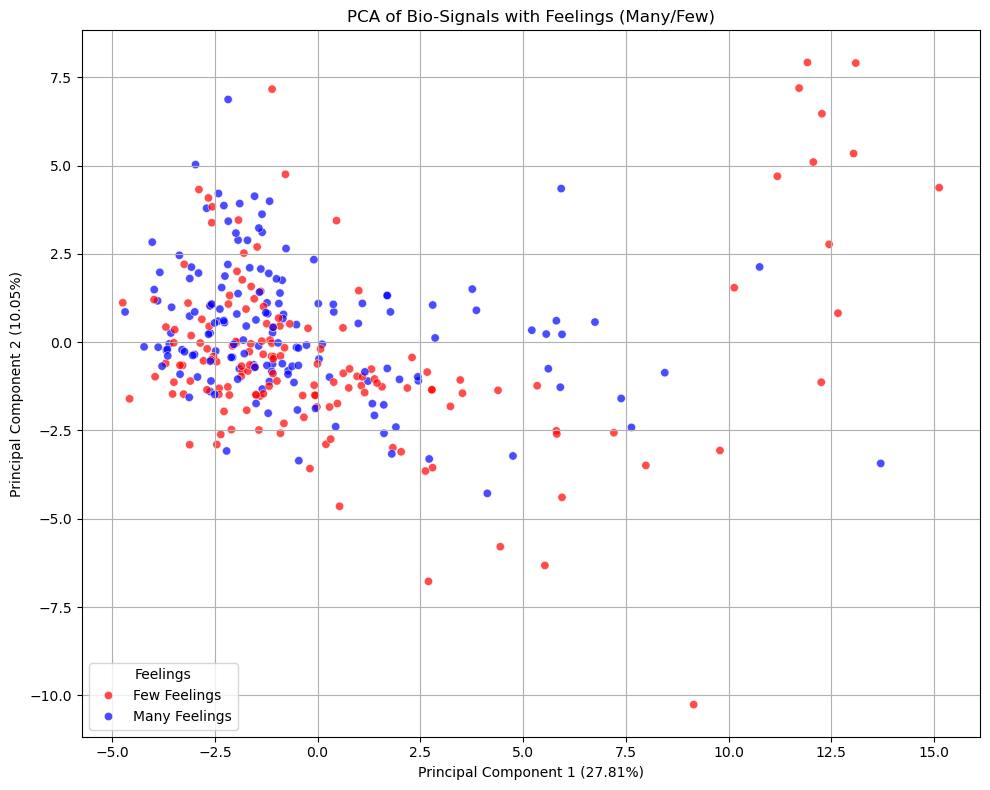

In [533]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(bio_signals_pca.shape[1])]
df_pca = pd.DataFrame(bio_signals_pca, columns=pc_cols)

# Calculating the mean of the emo_signals
emo_signals_mean = np.mean(emo_signals_scaled, axis=1)

# Adding the mean values to the PCA DataFrame
df_pca['Mean'] = emo_signals_mean

# Make a dataframe of top 50% most feeling participants
df_pca['Mean'] = np.where(df_pca['Mean'] > df_pca['Mean'].median(), 1, 0) # if greater than median, 1 else 0

# Make a column called Feelings where 0 = few feelings and 1 = many feelings
df_pca['Feelings'] = np.where(df_pca['Mean'] == 1, 'Many Feelings', 'Few Feelings') # if mean = 1, then feelings = many else few

# Plotting the PCA results with Feelings
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Feelings', palette={'Many Feelings': 'blue', 'Few Feelings': 'red'}, alpha=0.7)
plt.title('PCA of Bio-Signals with Feelings (Many/Few)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.legend(title='Feelings')
plt.tight_layout()
plt.show()



### Bio-signals and positive vs. negative

Number of Positive moods: 142
Number of Negative moods: 170


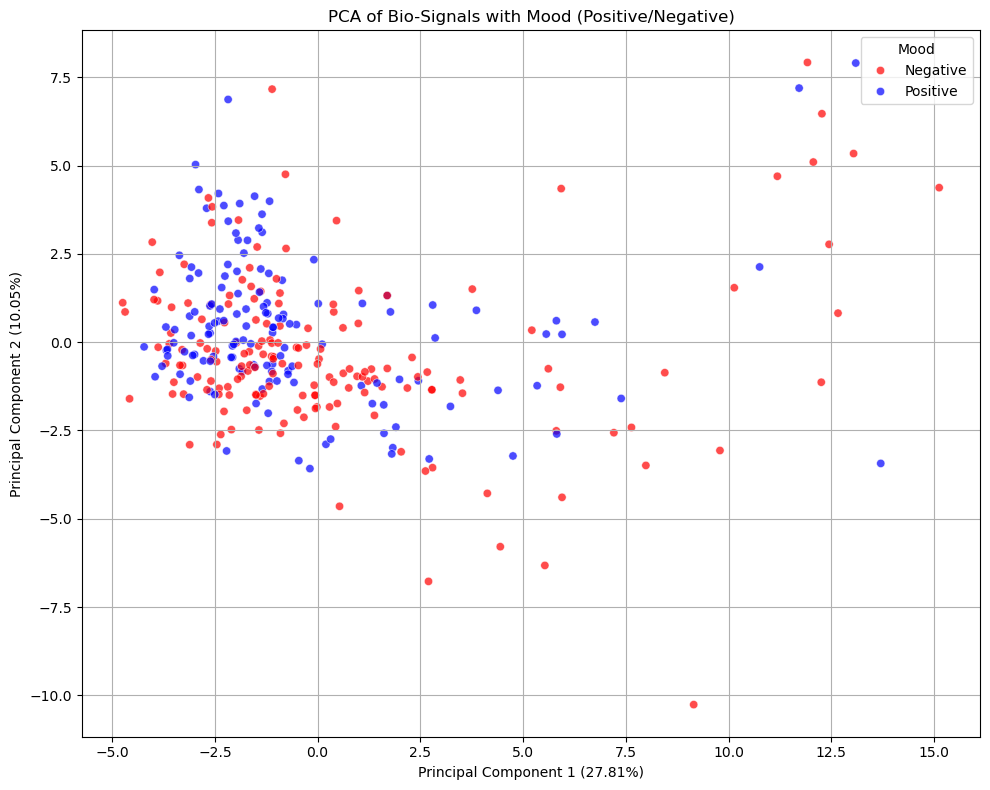

In [534]:
# Calculating the mean of the positive and negative self-rated questionnaire
positive_mean = np.mean(positive, axis=1)
negative_mean = np.mean(negative, axis=1)

# Adding the mean values to the PCA DataFrame
df_pca['Positive'] = positive_mean
df_pca['Negative'] = negative_mean

#print(df_pca)

# Make a dataframe of top 50% of positive and negative self-rated questionnaire
df_pca['Positive'] = np.where(df_pca['Positive'] > df_pca['Negative'], 1, 0) # if greater than median, 1 else 0 
#df_pca['Negative'] = np.where(df_pca['Negative'] > df_pca['Positive'](), 1, 0) # if greater than median, 1 else 0

# Combine the Positive and Negative columns into a single column where 1 = Positive, -1 = Negative
df_pca['Mood'] = np.where(df_pca['Positive'] == 1, 'Positive', 'Negative') # if positive = 1, then mood = positive else negative

# Count number of positive and negative moods
positive_count = df_pca['Mood'].value_counts().get('Positive', 0)
negative_count = df_pca['Mood'].value_counts().get('Negative', 0)
print(f"Number of Positive moods: {positive_count}")
print(f"Number of Negative moods: {negative_count}")

# Plotting the PCA results with Mood
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Mood', palette={'Positive': 'blue', 'Negative': 'red'}, alpha=0.7)
plt.title('PCA of Bio-Signals with Mood (Positive/Negative)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.legend(title='Mood')
plt.tight_layout()
plt.show()

## Bio-signals and Phases

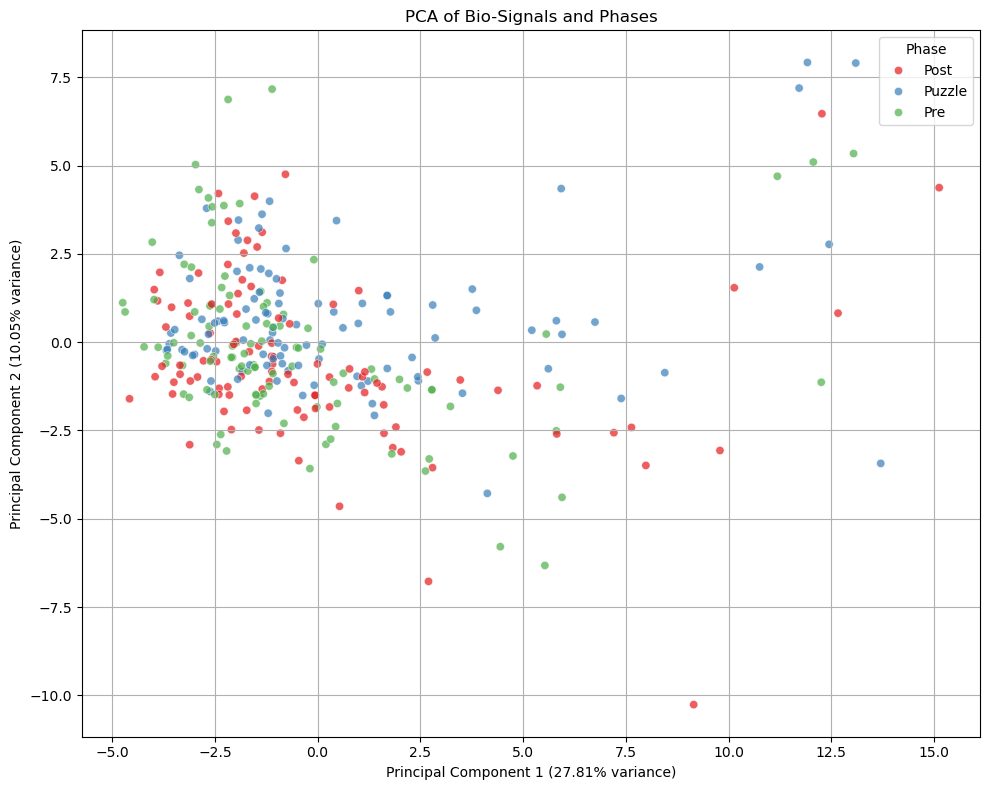

In [535]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(bio_signals_pca.shape[1])]
df_pca = pd.DataFrame(bio_signals_pca, columns=pc_cols)
df_pca['Phase'] = data['Phase'].values

# Rename phases to 'Pre', 'Puzzle', 'Post'
df_pca['Phase'] = df_pca['Phase'].replace({'phase1': 'Pre', 'phase2': 'Puzzle', 'phase3': 'Post'})

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Phase', palette='Set1', alpha=0.7)
plt.title('PCA of Bio-Signals and Phases')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.grid(True)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

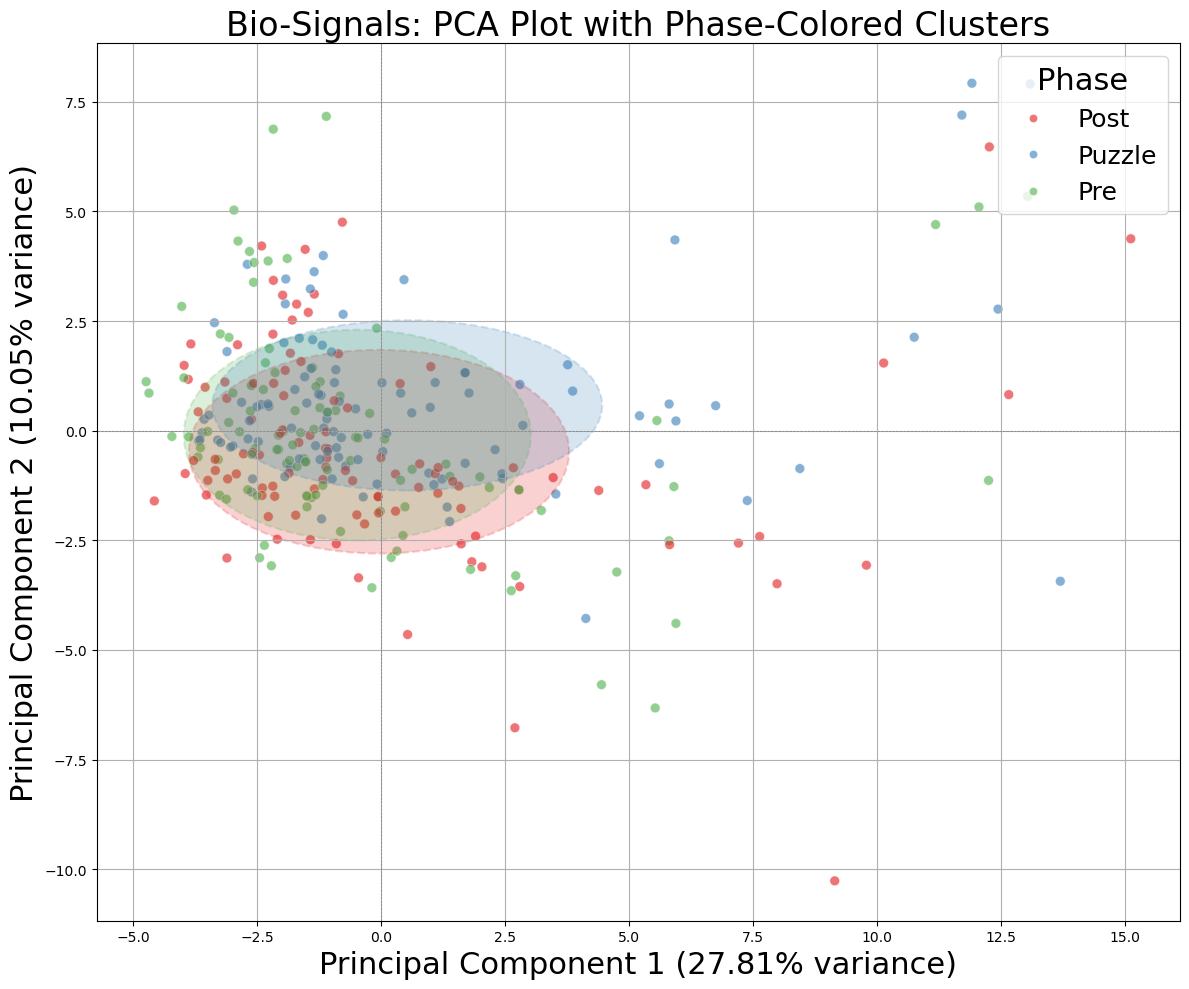

In [536]:
# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(bio_signals_pca.shape[1])]
df_pca = pd.DataFrame(bio_signals_pca, columns=pc_cols)
df_pca['Phase'] = data['Phase'].values

# Rename phases to 'Pre', 'Puzzle', 'Post'
df_pca['Phase'] = df_pca['Phase'].replace({'phase1': 'Pre', 'phase2': 'Puzzle', 'phase3': 'Post'})

# Add a constant size for the bubbles
df_pca['size'] = 100  # constant bubble size

# Set up the color palette
phases = df_pca['Phase'].unique()
palette = sns.color_palette('Set1', n_colors=len(phases))
phase_colors = dict(zip(phases, palette))

# Start the plot
plt.figure(figsize=(12, 10))

# Bubble scatterplot
scatter = sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Phase',
    size='size', sizes=(50, 300),
    alpha=0.6, palette=phase_colors, legend='brief'
)

# Add ellipses colored like the points
for phase, group in df_pca.groupby('Phase'):
    x_mean = group['PC1'].mean()
    y_mean = group['PC2'].mean()
    x_std = group['PC1'].std()
    y_std = group['PC2'].std()

    ellipse = Ellipse(
        (x_mean, y_mean),
        width=2 * x_std, height=2 * y_std,
        edgecolor=phase_colors[phase],
        facecolor=phase_colors[phase],
        alpha=0.2,
        linestyle='--',
        linewidth=1.5
    )
    plt.gca().add_patch(ellipse)


# Plot formatting
plt.title('Bio-Signals: PCA Plot with Phase-Colored Clusters', fontsize=24)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=22)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=22)
plt.grid(True)
plt.axhline(0, linestyle='--', color='grey', linewidth=0.5)
plt.axvline(0, linestyle='--', color='grey', linewidth=0.5)
# Remove size legend from the handles
handles, labels = scatter.get_legend_handles_labels()
new_handles = []
new_labels = []
# Only keep the handles/labels related to 'Phase'
for handle, label in zip(handles, labels):
    if label in df_pca['Phase'].unique().astype(str):
        new_handles.append(handle)
        new_labels.append(label)
plt.legend(new_handles, new_labels, title='Phase', loc='upper right', fontsize=18, title_fontsize=22)
plt.tight_layout()
plt.savefig('PCA_Bio_Signals_Phase.png', dpi=300, bbox_inches='tight') # Save the figure
plt.show()